In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text
from scipy.interpolate import interp1d

In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

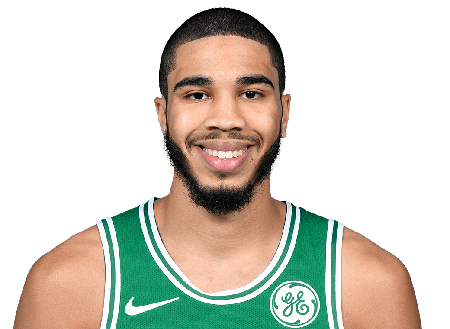

In [3]:
url = f"https://cdn.nba.com/headshots/nba/latest/1040x760/1628369.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.thumbnail(size=(450,450))
img

In [4]:
player_id=find_players_by_full_name("Jayson Tatum")[0]['id']
player_id

1628369

In [5]:
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs

In [6]:
tatum_scoring_17_18=PlayerGameLogs(measure_type_player_game_logs_nullable='Scoring', player_id_nullable=player_id,
                           season_nullable='2017-18')

In [7]:
tatum_scoring_18_19=PlayerGameLogs(measure_type_player_game_logs_nullable='Scoring', player_id_nullable=player_id,
                           season_nullable='2018-19')

In [8]:
tatum_scoring_19_20=PlayerGameLogs(measure_type_player_game_logs_nullable='Scoring', player_id_nullable=player_id,
                           season_nullable='2019-20')

In [9]:
tatum_scoring_df_17_18 = tatum_scoring_17_18.get_data_frames()[0]

In [10]:
tatum_scoring_df_18_19 = tatum_scoring_18_19.get_data_frames()[0]

In [11]:
tatum_scoring_df_19_20 = tatum_scoring_19_20.get_data_frames()[0]

In [12]:
tatum_scoring_df_17_18.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'PCT_FGA_2PT', 'PCT_FGA_3PT', 'PCT_PTS_2PT',
       'PCT_PTS_2PT_MR', 'PCT_PTS_3PT', 'PCT_PTS_FB', 'PCT_PTS_FT',
       'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT', 'PCT_AST_2PM', 'PCT_UAST_2PM',
       'PCT_AST_3PM', 'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'PCT_FGA_2PT_RANK',
       'PCT_FGA_3PT_RANK', 'PCT_PTS_2PT_RANK', 'PCT_PTS_2PT_MR_RANK',
       'PCT_PTS_3PT_RANK', 'PCT_PTS_FB_RANK', 'PCT_PTS_FT_RANK',
       'PCT_PTS_OFF_TOV_RANK', 'PCT_PTS_PAINT_RANK', 'PCT_AST_2PM_RANK',
       'PCT_UAST_2PM_RANK', 'PCT_AST_3PM_RANK', 'PCT_UAST_3PM_RANK',
       'PCT_AST_FGM_RANK', 'PCT_UAST_FGM_RANK'],
      dtype='object')

In [13]:
tatum_scoring_df = pd.concat([tatum_scoring_df_17_18, tatum_scoring_df_18_19, tatum_scoring_df_19_20])
tatum_scoring_df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,PCT_PTS_FB_RANK,PCT_PTS_FT_RANK,PCT_PTS_OFF_TOV_RANK,PCT_PTS_PAINT_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK
0,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701215,2018-04-10T00:00:00,BOS @ WAS,L,...,7,14,7,66,1,62,55,2,38,29
1,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701202,2018-04-08T00:00:00,BOS vs. ATL,L,...,16,56,18,6,24,54,1,9,27,46
2,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701171,2018-04-04T00:00:00,BOS @ TOR,L,...,2,65,58,3,63,9,60,9,75,5
3,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701162,2018-04-03T00:00:00,BOS @ MIL,L,...,47,13,34,61,41,25,53,7,54,27
4,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701140,2018-03-31T00:00:00,BOS vs. TOR,W,...,45,43,27,21,54,24,1,9,56,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900072,2019-11-01T00:00:00,BOS vs. NYK,W,...,15,46,55,53,5,60,29,18,12,54
62,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900058,2019-10-30T00:00:00,BOS vs. MIL,W,...,45,57,38,23,10,55,19,34,11,56
63,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900029,2019-10-26T00:00:00,BOS @ NYK,W,...,52,23,2,23,63,1,1,40,44,20
64,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900017,2019-10-25T00:00:00,BOS vs. TOR,W,...,45,23,7,42,16,37,1,40,7,58


In [14]:
tatum_normal_17_18 = PlayerGameLogs(player_id_nullable=player_id, season_nullable='2017-18')

In [15]:
tatum_normal_18_19 = PlayerGameLogs(player_id_nullable=player_id, season_nullable='2018-19')

In [16]:
tatum_normal_19_20 = PlayerGameLogs(player_id_nullable=player_id, season_nullable='2019-20')

In [17]:
tatum_normal_df_17_18 = tatum_normal_17_18.get_data_frames()[0]

In [18]:
tatum_normal_df_18_19 = tatum_normal_18_19.get_data_frames()[0]

In [19]:
tatum_normal_df_19_20 = tatum_normal_19_20.get_data_frames()[0]

In [20]:
tatum_normal_df = pd.concat([tatum_normal_df_17_18, tatum_normal_df_18_19, tatum_normal_df_19_20])
tatum_normal_df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK
0,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701215,2018-04-10T00:00:00,BOS @ WAS,L,...,1,37,1,6,20,48,72,34,5,1
1,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701202,2018-04-08T00:00:00,BOS vs. ATL,L,...,1,37,44,79,5,13,34,9,5,1
2,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701171,2018-04-04T00:00:00,BOS @ TOR,L,...,24,37,1,6,60,68,72,61,5,1
3,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701162,2018-04-03T00:00:00,BOS @ MIL,L,...,7,15,1,1,5,8,20,19,5,1
4,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701140,2018-03-31T00:00:00,BOS vs. TOR,W,...,46,37,1,32,11,2,30,11,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900072,2019-11-01T00:00:00,BOS vs. NYK,W,...,51,40,1,57,46,31,22,51,11,1
62,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900058,2019-10-30T00:00:00,BOS vs. MIL,W,...,51,17,61,65,18,28,14,46,11,1
63,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900029,2019-10-26T00:00:00,BOS @ NYK,W,...,4,3,47,40,35,56,11,37,11,1
64,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900017,2019-10-25T00:00:00,BOS vs. TOR,W,...,4,40,47,1,6,28,32,11,11,1


In [21]:
tatum_normal_df.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK'],
      dtype='object')

In [22]:
merged_df=pd.merge(left=tatum_normal_df, right=tatum_scoring_df, on=('SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'GAME_DATE',
                                                         'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'MATCHUP', 'WL'))
merged_df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID_x,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,PCT_PTS_FB_RANK,PCT_PTS_FT_RANK,PCT_PTS_OFF_TOV_RANK,PCT_PTS_PAINT_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK
0,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701215,2018-04-10T00:00:00,BOS @ WAS,L,...,7,14,7,66,1,62,55,2,38,29
1,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701202,2018-04-08T00:00:00,BOS vs. ATL,L,...,16,56,18,6,24,54,1,9,27,46
2,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701171,2018-04-04T00:00:00,BOS @ TOR,L,...,2,65,58,3,63,9,60,9,75,5
3,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701162,2018-04-03T00:00:00,BOS @ MIL,L,...,47,13,34,61,41,25,53,7,54,27
4,2017-18,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021701140,2018-03-31T00:00:00,BOS vs. TOR,W,...,45,43,27,21,54,24,1,9,56,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900072,2019-11-01T00:00:00,BOS vs. NYK,W,...,15,46,55,53,5,60,29,18,12,54
221,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900058,2019-10-30T00:00:00,BOS vs. MIL,W,...,45,57,38,23,10,55,19,34,11,56
222,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900029,2019-10-26T00:00:00,BOS @ NYK,W,...,52,23,2,23,63,1,1,40,44,20
223,2019-20,1628369,Jayson Tatum,1610612738,BOS,Boston Celtics,0021900017,2019-10-25T00:00:00,BOS vs. TOR,W,...,45,23,7,42,16,37,1,40,7,58


In [23]:
list(merged_df.columns)

['SEASON_YEAR',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID_x',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'WL',
 'MIN_x',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'NBA_FANTASY_PTS',
 'DD2',
 'TD3',
 'GP_RANK_x',
 'W_RANK_x',
 'L_RANK_x',
 'W_PCT_RANK_x',
 'MIN_RANK_x',
 'FGM_RANK',
 'FGA_RANK',
 'FG_PCT_RANK',
 'FG3M_RANK',
 'FG3A_RANK',
 'FG3_PCT_RANK',
 'FTM_RANK',
 'FTA_RANK',
 'FT_PCT_RANK',
 'OREB_RANK',
 'DREB_RANK',
 'REB_RANK',
 'AST_RANK',
 'TOV_RANK',
 'STL_RANK',
 'BLK_RANK',
 'BLKA_RANK',
 'PF_RANK',
 'PFD_RANK',
 'PTS_RANK',
 'PLUS_MINUS_RANK',
 'NBA_FANTASY_PTS_RANK',
 'DD2_RANK',
 'TD3_RANK',
 'TEAM_ID_y',
 'MIN_y',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',

## Calculating scoring performance

In [24]:
merged_df = merged_df.sort_values(by='GAME_DATE')

In [25]:
merged_df.loc[:, 'PTS_FROM_3PT']=merged_df.PTS * merged_df.PCT_PTS_3PT
merged_df.loc[:, 'PTS_FROM_2PT_MR']=merged_df.PTS * merged_df.PCT_PTS_2PT_MR
merged_df.loc[:, 'PTS_FROM_PAINT']=merged_df.PTS * merged_df.PCT_PTS_PAINT
merged_df.loc[:, 'PTS_FROM_FT']=merged_df.PTS * merged_df.PCT_PTS_FT

In [26]:
merged_df.loc[:, 'PTS_FROM_3PT_CUMSUM']=merged_df.PTS_FROM_3PT.cumsum()
merged_df.loc[:, 'PTS_FROM_2PT_MR_CUMSUM']=merged_df.PTS_FROM_2PT_MR.cumsum()
merged_df.loc[:, 'PTS_FROM_PAINT_CUMSUM']=merged_df.PTS_FROM_PAINT.cumsum()
merged_df.loc[:, 'PTS_FROM_FT_CUMSUM']=merged_df.PTS_FROM_FT.cumsum()

In [27]:
game_dates=[item.split('T')[0] for item in merged_df['GAME_DATE'].tolist()]

In [28]:
plt.style.use('classic')

In [29]:
bball_gray = '#bfc9ca'
bball_white = '#fdfefe'
bball_green = '#239b56'
bball_black = '#17202a'

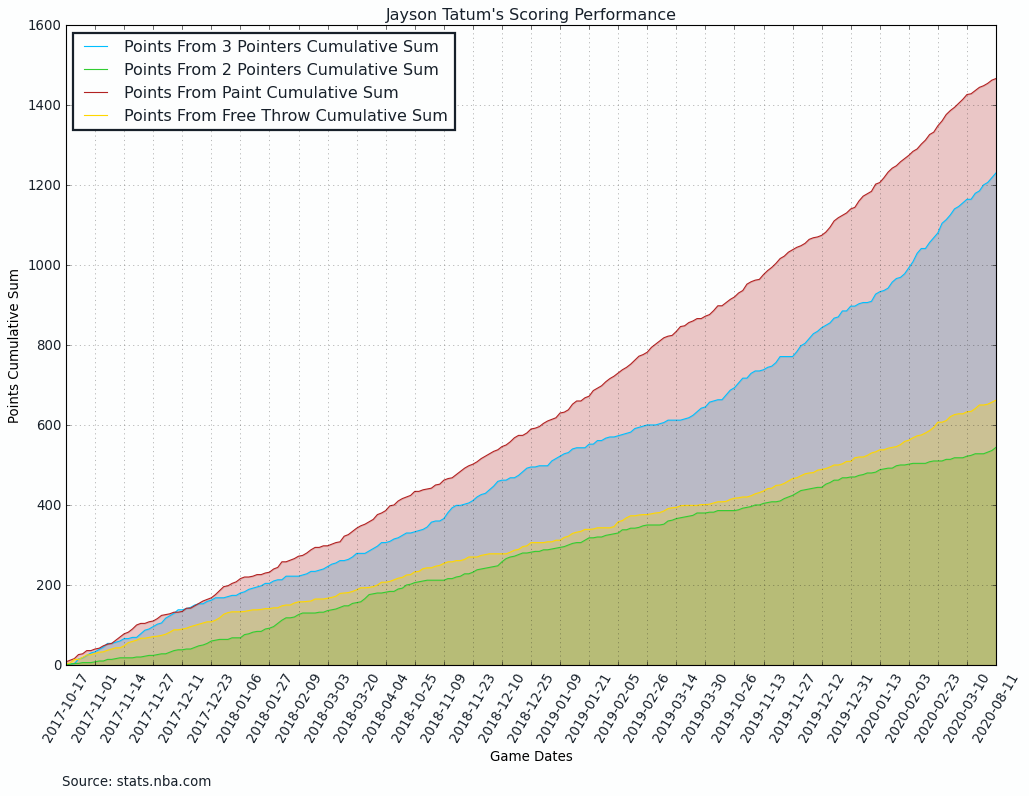

In [30]:
fig, ax=plt.subplots(figsize=(15,10))
ax = sns.lineplot(x=game_dates, y=merged_df.PTS_FROM_3PT_CUMSUM, data=merged_df, 
                  label='Points From 3 Pointers Cumulative Sum', color='deepskyblue')
ax.fill_between(game_dates, merged_df.PTS_FROM_3PT_CUMSUM, label='Points From 3 Pointers Cumulative Sum', 
                color='deepskyblue', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=merged_df.PTS_FROM_2PT_MR_CUMSUM, data=merged_df, 
                  label='Points From 2 Pointers Cumulative Sum', color='limegreen')
ax.fill_between(game_dates, merged_df.PTS_FROM_2PT_MR_CUMSUM, label='Points From 2 Pointers Cumulative Sum', 
                color='limegreen', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=merged_df.PTS_FROM_PAINT_CUMSUM, data=merged_df, 
                  label='Points From Paint Cumulative Sum', color='firebrick')
ax.fill_between(game_dates, merged_df.PTS_FROM_PAINT_CUMSUM, label='Points From Paint Cumulative Sum', 
                color='firebrick', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=merged_df.PTS_FROM_FT_CUMSUM, data=merged_df, 
                  label='Points From Free Throw Cumulative Sum', color='gold')
ax.fill_between(game_dates, merged_df.PTS_FROM_FT_CUMSUM, label='Points From Free Throw Cumulative Sum', 
                color='gold', alpha=0.25)

ax.set_xticks(ticks=[date for date in range(0, len(game_dates), 7)])
ax.set_xticklabels(labels=[game_dates[i] for i in range(0, len(game_dates), 7)])
ax.set_xlabel(xlabel='Game Dates')
ax.set_ylabel(ylabel='Points Cumulative Sum')
plt.xticks(rotation=60)

ax.set_title('Jayson Tatum\'s Scoring Performance', color=bball_black)
legend = ax.legend(['Points From 3 Pointers Cumulative Sum', 'Points From 2 Pointers Cumulative Sum', 
                    'Points From Paint Cumulative Sum', 'Points From Free Throw Cumulative Sum'], loc='upper left', 
                     bbox_to_anchor=(-0.001,1))

ax.text(35, -300, s='Source: stats.nba.com', ha='right', color=bball_black)

ax.grid(alpha=0.5)
ticks=ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_black)
    
ticks=ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_black)
    
frame = legend.get_frame()
frame.set_facecolor(bball_white)
frame.set_linewidth(2)
frame.set_edgecolor(bball_black)
for text in legend.get_texts():
    text.set_color(bball_black)
    
ax.set_frame_on(True)
ax.set_facecolor(bball_white)
fig.set_facecolor(bball_white)

In [31]:
tatum_shot_17_18=ShotChartDetail(team_id=0, player_id=player_id, season_nullable='2017-18', 
                                 season_type_all_star='Regular Season',context_measure_simple='EFG_PCT')

In [32]:
tatum_shot_18_19=ShotChartDetail(team_id=0, player_id=player_id, season_nullable='2018-19', 
                                 season_type_all_star='Regular Season',context_measure_simple='EFG_PCT')

In [33]:
tatum_shot_19_20=ShotChartDetail(team_id=0, player_id=player_id, season_nullable='2019-20', 
                                 season_type_all_star='Regular Season',context_measure_simple='EFG_PCT')

In [34]:
tatum_shot_df_17_18=tatum_shot_17_18.get_data_frames()[0]

In [35]:
tatum_shot_df_18_19=tatum_shot_18_19.get_data_frames()[0]

In [36]:
tatum_shot_df_19_20=tatum_shot_19_20.get_data_frames()[0]

In [37]:
tatum_shot_df_17_18.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [38]:
tatum_shot_df=pd.concat([tatum_shot_df_17_18, tatum_shot_df_18_19, tatum_shot_df_19_20])

In [39]:
tatum_shot_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700001,16,1628369,Jayson Tatum,1610612738,Boston Celtics,1,10,51,...,Center(C),Less Than 8 ft.,2,10,23,1,0,20171017,CLE,BOS
1,Shot Chart Detail,0021700001,92,1628369,Jayson Tatum,1610612738,Boston Celtics,1,4,33,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20171017,CLE,BOS
2,Shot Chart Detail,0021700001,196,1628369,Jayson Tatum,1610612738,Boston Celtics,2,9,56,...,Left Side Center(LC),24+ ft.,25,-107,233,1,0,20171017,CLE,BOS
3,Shot Chart Detail,0021700001,209,1628369,Jayson Tatum,1610612738,Boston Celtics,2,9,6,...,Center(C),Less Than 8 ft.,2,-12,22,1,0,20171017,CLE,BOS
4,Shot Chart Detail,0021700001,311,1628369,Jayson Tatum,1610612738,Boston Celtics,2,1,50,...,Right Side Center(RC),16-24 ft.,17,131,117,1,0,20171017,CLE,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,Shot Chart Detail,0021901301,366,1628369,Jayson Tatum,1610612738,Boston Celtics,3,11,20,...,Right Side Center(RC),24+ ft.,25,154,198,1,1,20200811,MEM,BOS
1222,Shot Chart Detail,0021901301,430,1628369,Jayson Tatum,1610612738,Boston Celtics,3,6,59,...,Left Side Center(LC),24+ ft.,25,-150,200,1,1,20200811,MEM,BOS
1223,Shot Chart Detail,0021901301,499,1628369,Jayson Tatum,1610612738,Boston Celtics,3,2,19,...,Left Side(L),16-24 ft.,18,-174,72,1,1,20200811,MEM,BOS
1224,Shot Chart Detail,0021901301,510,1628369,Jayson Tatum,1610612738,Boston Celtics,3,1,26,...,Right Side(R),8-16 ft.,13,132,6,1,1,20200811,MEM,BOS


In [40]:
tatum_shot_df.SHOT_ZONE_BASIC.unique()

array(['Restricted Area', 'Above the Break 3', 'Mid-Range',
       'In The Paint (Non-RA)', 'Left Corner 3', 'Right Corner 3',
       'Backcourt'], dtype=object)

In [41]:
grouped=tatum_shot_df.groupby('GAME_DATE').SHOT_ZONE_BASIC.value_counts()
grouped

GAME_DATE  SHOT_ZONE_BASIC      
20171017   Restricted Area          8
           Above the Break 3        2
           Mid-Range                2
20171018   Restricted Area          3
           Mid-Range                2
                                   ..
20200809   Right Corner 3           1
20200811   Above the Break 3        5
           Mid-Range                5
           In The Paint (Non-RA)    2
           Restricted Area          1
Name: SHOT_ZONE_BASIC, Length: 996, dtype: int64

In [42]:
unstacked=grouped.unstack(fill_value=0)
unstacked

SHOT_ZONE_BASIC,Above the Break 3,Backcourt,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
GAME_DATE,,,,,,,
20171017,2,0,0,0,2,8,0
20171018,1,0,1,0,2,3,0
20171020,2,0,2,0,2,2,0
20171024,3,0,1,1,1,7,2
20171026,2,0,0,1,2,1,0
...,...,...,...,...,...,...,...
20200804,4,0,1,1,2,3,0
20200805,6,1,0,0,1,2,1
20200807,6,0,2,1,4,1,0


In [43]:
unstacked=unstacked.rename(columns={'Above the Break 3': 'ABOVE_THE_BREAK_3', 
                                    'In The Paint (Non-RA)': 'IN_THE_PAINT_NON_RA',
                                    'Left Corner 3': 'LEFT_CORNER_3',
                                    'Mid-Range': 'MID_RANGE',
                                    'Restricted Area': 'RESTRICTED_AREA',
                                    'Right Corner 3': 'RIGHT_CORNER_3',
                                    'Backcourt': 'BACKCOURT'})
unstacked

SHOT_ZONE_BASIC,ABOVE_THE_BREAK_3,BACKCOURT,IN_THE_PAINT_NON_RA,LEFT_CORNER_3,MID_RANGE,RESTRICTED_AREA,RIGHT_CORNER_3
GAME_DATE,,,,,,,
20171017,2,0,0,0,2,8,0
20171018,1,0,1,0,2,3,0
20171020,2,0,2,0,2,2,0
20171024,3,0,1,1,1,7,2
20171026,2,0,0,1,2,1,0
...,...,...,...,...,...,...,...
20200804,4,0,1,1,2,3,0
20200805,6,1,0,0,1,2,1
20200807,6,0,2,1,4,1,0


In [44]:
unstacked.loc[:, 'TOTAL_FGA']=unstacked.sum(axis=1)
unstacked

SHOT_ZONE_BASIC,ABOVE_THE_BREAK_3,BACKCOURT,IN_THE_PAINT_NON_RA,LEFT_CORNER_3,MID_RANGE,RESTRICTED_AREA,RIGHT_CORNER_3,TOTAL_FGA
GAME_DATE,,,,,,,,
20171017,2,0,0,0,2,8,0,12
20171018,1,0,1,0,2,3,0,7
20171020,2,0,2,0,2,2,0,8
20171024,3,0,1,1,1,7,2,15
20171026,2,0,0,1,2,1,0,6
...,...,...,...,...,...,...,...,...
20200804,4,0,1,1,2,3,0,11
20200805,6,1,0,0,1,2,1,11
20200807,6,0,2,1,4,1,0,14


In [45]:
cumulative_sums=unstacked.cumsum()
cumulative_sums

SHOT_ZONE_BASIC,ABOVE_THE_BREAK_3,BACKCOURT,IN_THE_PAINT_NON_RA,LEFT_CORNER_3,MID_RANGE,RESTRICTED_AREA,RIGHT_CORNER_3,TOTAL_FGA
GAME_DATE,,,,,,,,
20171017,2,0,0,0,2,8,0,12
20171018,3,0,1,0,4,11,0,19
20171020,5,0,3,0,6,13,0,27
20171024,8,0,4,1,7,20,2,42
20171026,10,0,4,2,9,21,2,48
...,...,...,...,...,...,...,...,...
20200804,755,2,403,117,681,962,115,3035
20200805,761,3,403,117,682,964,116,3046
20200807,767,3,405,118,686,965,116,3060


In [46]:
cumulative_sums.loc[:, 'CORNER_3']=cumulative_sums.LEFT_CORNER_3 + cumulative_sums.RIGHT_CORNER_3
cumulative_sums

SHOT_ZONE_BASIC,ABOVE_THE_BREAK_3,BACKCOURT,IN_THE_PAINT_NON_RA,LEFT_CORNER_3,MID_RANGE,RESTRICTED_AREA,RIGHT_CORNER_3,TOTAL_FGA,CORNER_3
GAME_DATE,,,,,,,,,
20171017,2,0,0,0,2,8,0,12,0
20171018,3,0,1,0,4,11,0,19,0
20171020,5,0,3,0,6,13,0,27,0
20171024,8,0,4,1,7,20,2,42,3
20171026,10,0,4,2,9,21,2,48,4
...,...,...,...,...,...,...,...,...,...
20200804,755,2,403,117,681,962,115,3035,232
20200805,761,3,403,117,682,964,116,3046,233
20200807,767,3,405,118,686,965,116,3060,234


In [47]:
target_columns=['ABOVE_THE_BREAK_3', 'BACKCOURT', 'IN_THE_PAINT_NON_RA', 'MID_RANGE', 'RESTRICTED_AREA', 'CORNER_3']

In [48]:
for column in target_columns:
    cumulative_sums.loc[:, f'{column}_PCT'] = cumulative_sums[column] / cumulative_sums['TOTAL_FGA']

In [49]:
cumulative_sums.columns

Index(['ABOVE_THE_BREAK_3', 'BACKCOURT', 'IN_THE_PAINT_NON_RA',
       'LEFT_CORNER_3', 'MID_RANGE', 'RESTRICTED_AREA', 'RIGHT_CORNER_3',
       'TOTAL_FGA', 'CORNER_3', 'ABOVE_THE_BREAK_3_PCT', 'BACKCOURT_PCT',
       'IN_THE_PAINT_NON_RA_PCT', 'MID_RANGE_PCT', 'RESTRICTED_AREA_PCT',
       'CORNER_3_PCT'],
      dtype='object', name='SHOT_ZONE_BASIC')

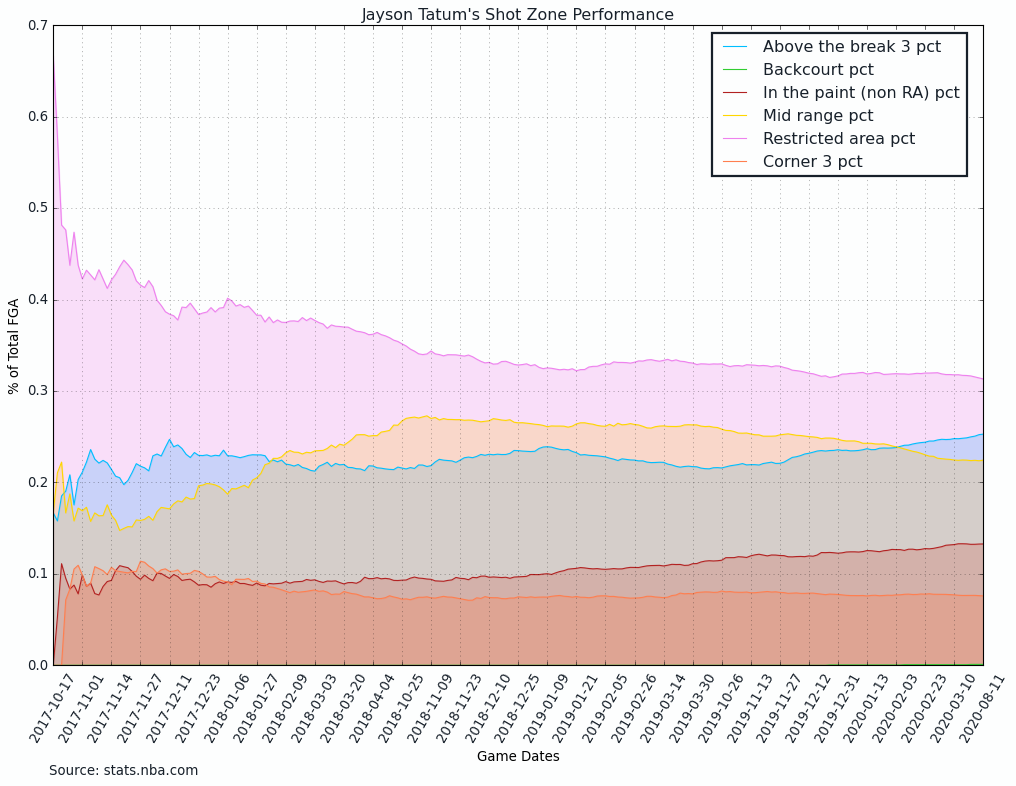

In [53]:
fig, ax=plt.subplots(figsize=(15,10))
ax = sns.lineplot(x=game_dates, y=cumulative_sums.ABOVE_THE_BREAK_3_PCT, data=cumulative_sums, 
                  label='% of Total FGA (Above the break 3 pct)', color='deepskyblue')
ax.fill_between(game_dates, cumulative_sums.ABOVE_THE_BREAK_3_PCT, label='% of Total FGA (Above the break 3 pct)', 
                color='deepskyblue', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=cumulative_sums.BACKCOURT_PCT, data=cumulative_sums, 
                  label='% of Total FGA (Backcourt pct)', color='limegreen')
ax.fill_between(game_dates, cumulative_sums.BACKCOURT_PCT, label='% of Total FGA (Backcourt pct)', 
                color='limegreen', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=cumulative_sums.IN_THE_PAINT_NON_RA_PCT, data=cumulative_sums, 
                  label='% of Total FGA (In the paint (non RA) pct)', color='firebrick')
ax.fill_between(game_dates, cumulative_sums.IN_THE_PAINT_NON_RA_PCT, label='% of Total FGA (In the paint (non RA) pct)', 
                color='firebrick', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=cumulative_sums.MID_RANGE_PCT, data=cumulative_sums, 
                  label='% of Total FGA (Mid range pct)', color='gold')
ax.fill_between(game_dates, cumulative_sums.MID_RANGE_PCT, label='% of Total FGA (Mid range pct)', 
                color='gold', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=cumulative_sums.RESTRICTED_AREA_PCT, data=cumulative_sums, 
                  label='% of Total FGA (Restricted area pct)', color='violet')
ax.fill_between(game_dates, cumulative_sums.RESTRICTED_AREA_PCT, label='% of Total FGA (Restricted area pct)', 
                color='violet', alpha=0.25)

ax = sns.lineplot(x=game_dates, y=cumulative_sums.CORNER_3_PCT, data=cumulative_sums, 
                  label='% of Total FGA (Corner 3 pct)', color='coral')
ax.fill_between(game_dates, cumulative_sums.CORNER_3_PCT, label='% of Total FGA (Corner 3 pct)', 
                color='coral', alpha=0.25)

ax.set_xticks(ticks=[date for date in range(0, len(game_dates), 7)])
ax.set_xticklabels(labels=[game_dates[i] for i in range(0, len(game_dates), 7)])
ax.set_xlabel(xlabel='Game Dates')
ax.set_ylabel(ylabel='% of Total FGA')
plt.xticks(rotation=60)

ax.set_title('Jayson Tatum\'s Shot Zone Performance', color=bball_black)
legend = ax.legend(['Above the break 3 pct', 'Backcourt pct', 'In the paint (non RA) pct', 
                    'Mid range pct', 'Restricted area pct', 'Corner 3 pct'], loc='upper left', bbox_to_anchor=(0.7,1))

ax.text(35, -0.12, s='Source: stats.nba.com', ha='right', color=bball_black)

ax.grid(alpha=0.5)
ticks=ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_black)
    
ticks=ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_black)
    
frame = legend.get_frame()
frame.set_facecolor(bball_white)
frame.set_linewidth(2)
frame.set_edgecolor(bball_black)
for text in legend.get_texts():
    text.set_color(bball_black)
    
ax.set_frame_on(True)
ax.set_facecolor(bball_white)
fig.set_facecolor(bball_white)